In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("SMSSpamCollection",sep='\t',names=['label','message'])

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.isnull().sum() #no missing values

label      0
message    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.shape #5572 rows and 2 columns

(5572, 2)

In [7]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
#assign labels
#0 for ham and 1 for spam 
df['label']=df['label'].map({'ham':0, 'spam':1})

In [9]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


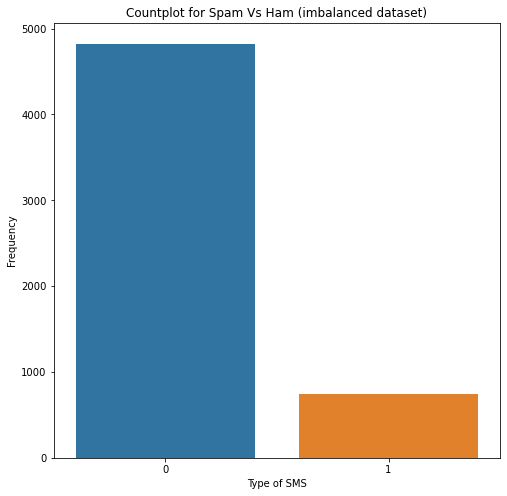

In [10]:
#Countplot for Spam Vs Ham (imbalanced dataset)
plt.figure(figsize=(8,8))
sns.countplot(x="label", data=df)
plt.title("Countplot for Spam Vs Ham (imbalanced dataset)")
plt.xlabel("Type of SMS")
plt.ylabel("Frequency")
plt.show()

In [11]:
#Make the dataset balanced
spam_count=df[df["label"]==1]
ham_count=df[df["label"]==0]

In [12]:
spam_count.shape[0]

747

In [13]:
ham_count.shape[0]

4825

In [14]:
count=int(ham_count.shape[0]/spam_count.shape[0])
count

6

In [15]:
for i in range(0,count-1):
    df=pd.concat([df,spam_count])
df.shape[0]

9307

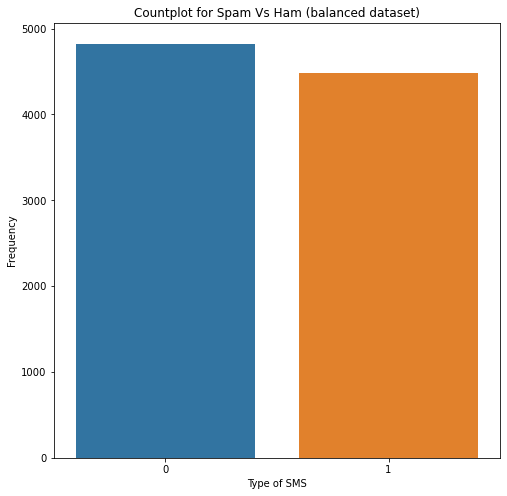

In [16]:
#Countplot for Spam Vs Ham (balanced dataset)
plt.figure(figsize=(8,8))
sns.countplot(x="label", data=df)
plt.title("Countplot for Spam Vs Ham (balanced dataset)")
plt.xlabel("Type of SMS")
plt.ylabel("Frequency")
plt.show()

In [17]:
df["label"].value_counts()

0    4825
1    4482
Name: label, dtype: int64

Feature Construction

In [18]:
#Creating new features

In [19]:
#word_count feature
df["word_count"]=df["message"].apply(lambda freq: len(freq.split()))
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


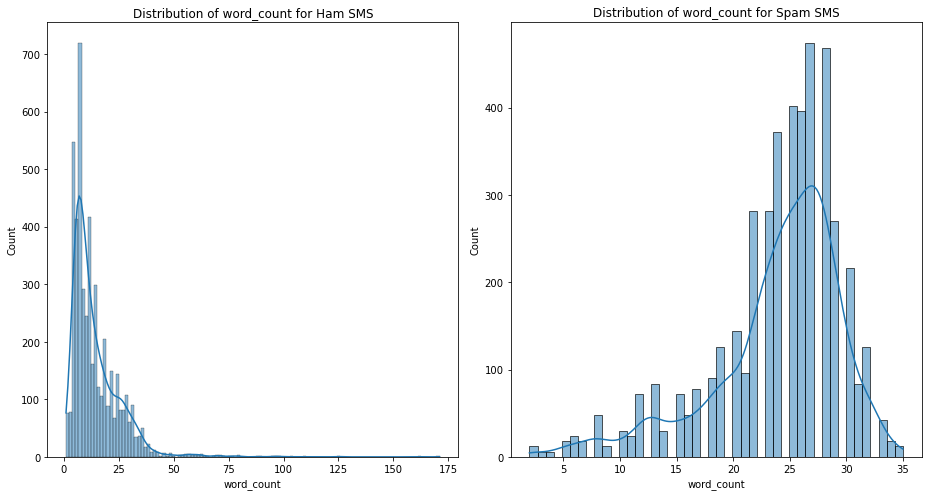

In [20]:
plt.figure(figsize=(13,7))

plt.subplot(1,2,1)
sns.histplot(df[df["label"]==0].word_count, kde=True)
plt.title("Distribution of word_count for Ham SMS")

plt.subplot(1,2,2)
sns.histplot(df[df["label"]==1].word_count, kde=True)
plt.title("Distribution of word_count for Spam SMS")

plt.tight_layout()
plt.show()

In [21]:
#contains_currency_symbols feature
def currency_present(data):
    symbols=['$','€','£','¥','₣','₹']
    for i in symbols:
        if i in data:
            return 1
    return 0

In [22]:
df["contains_currency_symbols"]=df["message"].apply(currency_present)
df.head()

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0


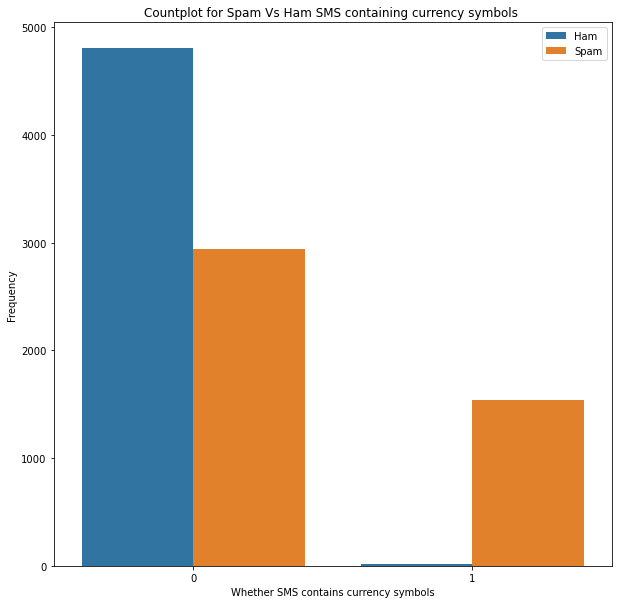

In [23]:
#Countplot for Spam Vs Ham SMS containing currency symbols 
plt.figure(figsize=(10,10))
sns.countplot(x="contains_currency_symbols", data=df, hue="label")
plt.title("Countplot for Spam Vs Ham SMS containing currency symbols ")
plt.xlabel("Whether SMS contains currency symbols")
plt.ylabel("Frequency")
plt.legend(labels=["Ham","Spam"])
plt.show()

In [24]:
#contains_numbers feature
def number_present(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [25]:
df["contains_numbers"]=df["message"].apply(number_present)
df.head()

,label,message,word_count,contains_currency_symbols,contains_numbers
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


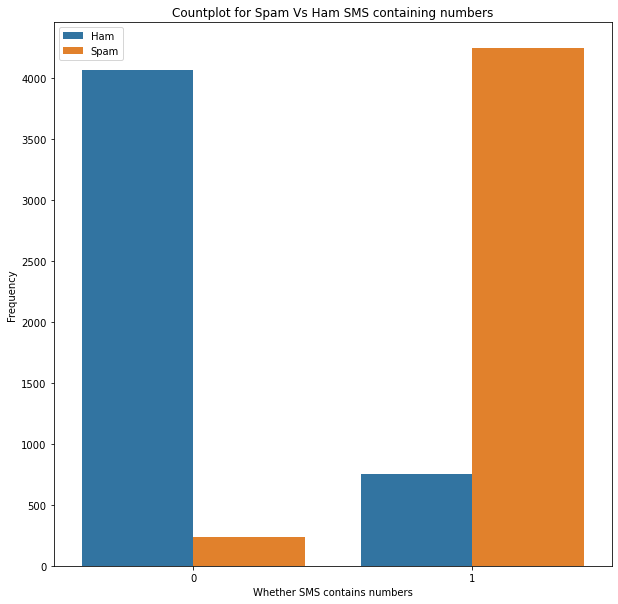

In [26]:
#Countplot for Spam Vs Ham SMS containing numbers
plt.figure(figsize=(10,10))
sns.countplot(x="contains_numbers", data=df, hue="label")
plt.title("Countplot for Spam Vs Ham SMS containing numbers")
plt.xlabel("Whether SMS contains numbers")
plt.ylabel("Frequency")
plt.legend(labels=["Ham","Spam"])
plt.show()

Data Cleaning

In [27]:
import nltk
import re

In [28]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanyadureja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sanyadureja/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [70]:
list_sms=list(df.message)
list_sms

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

In [31]:
corpus=[]
wml=WordNetLemmatizer()

Data Pre-processing

In [32]:
for sms in list_sms:
    message=re.sub(pattern="[^a-zA-Z]",repl=" ",string=sms) #Filtering out special characters and numbers
    message=message.lower() #Lowercase
    words=message.split() #Tokenization
    stop_words=[word for word in words if word not in set(stopwords.words("english"))] #Removal of stop words
    lemmatize_words=[wml.lemmatize(word) for word in stop_words] #Lemmatization
    message=" ".join(lemmatize_words)
    
    corpus.append(message)

In [33]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

Feature Extraction

In [34]:
#Creating the Bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names()

In [35]:
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
feature_names

['ac',
 'access',
 'account',
 'address',
 'admirer',
 'age',
 'already',
 'also',
 'always',
 'amp',
 'an',
 'another',
 'answer',
 'anything',
 'anytime',
 'apply',
 'area',
 'around',
 'asap',
 'ask',
 'asked',
 'attempt',
 'auction',
 'await',
 'awaiting',
 'award',
 'awarded',
 'away',
 'babe',
 'baby',
 'back',
 'balance',
 'best',
 'better',
 'bid',
 'big',
 'birthday',
 'bit',
 'biz',
 'bluetooth',
 'bonus',
 'book',
 'bored',
 'box',
 'boy',
 'break',
 'bt',
 'buy',
 'bx',
 'call',
 'caller',
 'calling',
 'camcorder',
 'camera',
 'cant',
 'car',
 'care',
 'cash',
 'cc',
 'cd',
 'chance',
 'charge',
 'charged',
 'charity',
 'chat',
 'check',
 'choose',
 'claim',
 'class',
 'close',
 'club',
 'co',
 'code',
 'collect',
 'collection',
 'colour',
 'com',
 'come',
 'coming',
 'comp',
 'complimentary',
 'comuk',
 'congrats',
 'congratulation',
 'contact',
 'content',
 'cool',
 'cost',
 'costa',
 'could',
 'cr',
 'crazy',
 'credit',
 'croydon',
 'cum',
 'currently',
 'custcare',
 'cu

In [37]:
X=pd.DataFrame(vectors,columns=feature_names)
y=df["label"]

In [38]:
X

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.4117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9303,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.326017,0.0,0.0,0.0,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.287064,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [39]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: label, Length: 9307, dtype: int64

In [40]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Training and testing

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

Naive Bayes Model

In [42]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)

In [43]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [44]:
cross_score=cross_val_score(mnb, X, y, scoring='f1', cv=10)
score=round(cross_score.mean(),4)

In [45]:
accuracy=score*100
print("Accuracy:",accuracy,"%")

Accuracy: 94.26 %


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1596
           1       0.94      0.95      0.94      1476

    accuracy                           0.94      3072
   macro avg       0.94      0.94      0.94      3072
weighted avg       0.94      0.94      0.94      3072



In [47]:
matrix=confusion_matrix(y_test, y_pred)

In [48]:
matrix

array([[1504,   92],
       [  81, 1395]])

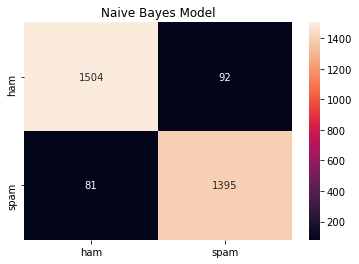

In [49]:
axis_labels=["ham","spam"]
sns.heatmap(data=matrix,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='g')
plt.title("Naive Bayes Model")
plt.show()

DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [51]:
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [52]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [53]:
cross_score=cross_val_score(dt, X, y, scoring='f1', cv=10)
score=round(cross_score.mean(),4)

In [54]:
accuracy=score*100
print("Accuracy:",accuracy,"%")

Accuracy: 97.97 %


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1596
           1       0.96      0.99      0.97      1476

    accuracy                           0.98      3072
   macro avg       0.98      0.98      0.98      3072
weighted avg       0.98      0.98      0.98      3072



In [56]:
matrix=confusion_matrix(y_test, y_pred)

In [57]:
matrix

array([[1531,   65],
       [  11, 1465]])

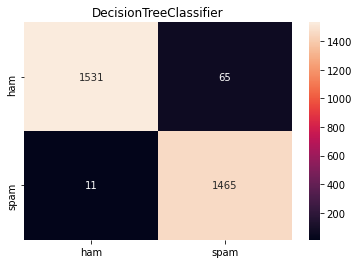

In [58]:
axis_labels=["ham","spam"]
sns.heatmap(data=matrix,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='g')
plt.title("DecisionTreeClassifier")
plt.show()

DecisionTreeClassifier is giving a higher accuracy than Naive Bayes Model.

Test the model with sample messages

In [64]:
def predict_sms(sample):
    message=re.sub(pattern="[^a-zA-Z]",repl=" ",string=sms) #Filtering out special characters and numbers
    message=message.lower() #Lowercase
    words=message.split() #Tokenization
    stop_words=[word for word in words if word not in set(stopwords.words("english"))] #Removal of stop words
    lemmatize_words=[wml.lemmatize(word) for word in stop_words] #Lemmatization
    message=" ".join(lemmatize_words)
    temp=tfidf.transform([message]).toarray()
    return mnb.predict(temp)

In [65]:
#Sample message 
sample_1="Congratulations! You have won the International Mega Lottery Jackpot of $5 million! To claim your prize, please provide your personal details and pay a small processing fee."
if predict_sms(sample_1):
    print("This is a SPAM message.")
else:
    print("This is not a SPAM message.")

This is a SPAM message.


In [66]:
#Sample message 
sample_2="You are the lucky winner of the Powerball Lottery! You've won $10 million! To receive your winnings, kindly send a payment for taxes and processing fees."
if predict_sms(sample_2):
    print("This is a SPAM message.")
else:
    print("This is not a SPAM message.")

This is a SPAM message.
